In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from tabulate import tabulate
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as stats

In [11]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [12]:
df = pd.read_csv('../data/stock-market/ETFs/spy.us.txt')
df['Date'] = pd.to_datetime(df['Date'])

# TOC
- [EDA](#EDA)
  - [Summary statistics](#Summary-statistics)
  - [Distribution](#Distribution)
  - [Histrogrammer-for-fordelinger](#Histrogrammer-for-fordelinger)
- [Preprocessing](#Preprocessing)
  - [Sliding window time series](#Sliding-window-time-series)
- [Transformation](#Transformation)
  - [Encoding categorical data](#Encoding-categorical-data)
  - [Log-transforming-skewed-volume-data](#Log-transforming-skewed-volume-data)
  - [Normalizing-to-scale-numerical-features](#Normalizing-to-scale-numerical-features)
- [Preprocess-er-ferdig](#Preprocess-er-ferdig)


# EDA

## Summary statistics

In [13]:
df.head()
# latex_table = tabulate(df.head(), headers='keys', tablefmt='latex')
# print(latex_table)

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,104.77,106.00,104.68,105.79,70221808,0
1,2005-02-28,105.55,105.68,104.56,105.08,79695344,0
2,2005-03-01,105.22,105.87,105.22,105.62,54607412,0
3,2005-03-02,105.21,106.22,105.10,105.57,73733090,0
4,2005-03-03,105.99,106.20,105.15,105.61,71286823,0


In [14]:
df.describe()
# latex_table = tabulate(df.describe(), headers='keys', tablefmt='latex', floatfmt=".2f")
# print(latex_table)

,Date,Open,High,Low,Close,Volume,OpenInt
count,3201,3201.00,3201.00,3201.00,3201.00,3201.00,3201.00
mean,2011-07-05 17:50:12.933458432,141.26,142.01,140.44,141.28,168053377.03,0.00
min,2005-02-25 00:00:00,59.20,60.98,58.45,59.33,17528276.00,0.00
25%,2008-05-01 00:00:00,107.81,108.38,107.01,107.72,85233525.00,0.00
50%,2011-07-06 00:00:00,123.61,124.25,122.73,123.55,133631300.00,0.00
75%,2014-09-10 00:00:00,183.68,184.87,182.45,183.70,213165418.00,0.00
max,2017-11-10 00:00:00,258.97,259.35,258.22,259.11,1000439720.00,0.00
std,NaN,46.51,46.49,46.54,46.53,118091256.06,0.00


In [15]:
df.info()
# latex_table = tabulate(df.info(), headers='keys', tablefmt='latex')
# print(latex_table)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3201 non-null   datetime64[ns]
 1   Open     3201 non-null   float64       
 2   High     3201 non-null   float64       
 3   Low      3201 non-null   float64       
 4   Close    3201 non-null   float64       
 5   Volume   3201 non-null   int64         
 6   OpenInt  3201 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 175.2 KB


In [16]:
df.isnull().sum()
# null_counts = df.isnull().sum().reset_index()
# null_counts.columns = ['Column', 'Null Count']
# latex_table = tabulate(null_counts, headers='keys', tablefmt='latex')
# print(latex_table)

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [17]:
df.duplicated().sum()
# duplicate_count = df.duplicated().sum()
# duplicate_summary = pd.DataFrame({
#     'Description': ['Total Duplicate Rows'],
#     'Count': [duplicate_count]
# })
# latex_table = tabulate(duplicate_summary, headers='keys', tablefmt='latex', showindex=False)
# print(latex_table)


np.int64(0)

## Distribution
<a name="Distribution"></a>

In [18]:
# candle chart 

# Convert 'Date' to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Create a copy of the DataFrame for the last month
df_copy = df.copy(deep=True)
df_copy = df_copy[df_copy['Date'] > df_copy['Date'].max() - pd.DateOffset(months=1)]

# Create subplots with individual row heights
fig = make_subplots(rows=2, cols=1, 
                    subplot_titles=(
                        'S&P 500 (SPY) Price Chart 25. february 2005 to 10. november 2017', 
                        'S&P 500 (SPY) Price Chart, 11. november 2017 to 10. november 2017'),
                    vertical_spacing=0.15,
                    row_heights=[0.7, 0.3])  # Adjust the heights as needed

# Add the first candlestick chart (entire data)
fig.add_trace(go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    increasing_line_color='green',
    decreasing_line_color='red',
    name=''  # Set the name to an empty string
), row=1, col=1)

# Add the second candlestick chart (last month)
fig.add_trace(go.Candlestick(
    x=df_copy['Date'],
    open=df_copy['Open'],
    high=df_copy['High'],
    low=df_copy['Low'],
    close=df_copy['Close'],
    increasing_line_color='green',
    decreasing_line_color='red',
    name=''  # Set the name to an empty string
), row=2, col=1)

# Update layout settings
fig.update_layout(
    title='S&P 500 (SPY) Price Charts',
    xaxis_title='Date',
    yaxis_title='Price features',
    xaxis_rangeslider_visible=False,  # Disable range slider for the first x-axis
    height=1000,  # Overall height for the entire figure
    showlegend=False  # Hide the legend
)

# Disable range slider for the second x-axis
fig.update_xaxes(rangeslider_visible=False, row=2, col=1)

# Optionally, adjust the y-axes for each subplot
fig.update_yaxes(title_text='Price features', row=1, col=1)
fig.update_yaxes(title_text='Price features', row=2, col=1)

# Show the plot
fig.show()


## Histrogrammer for fordelinger

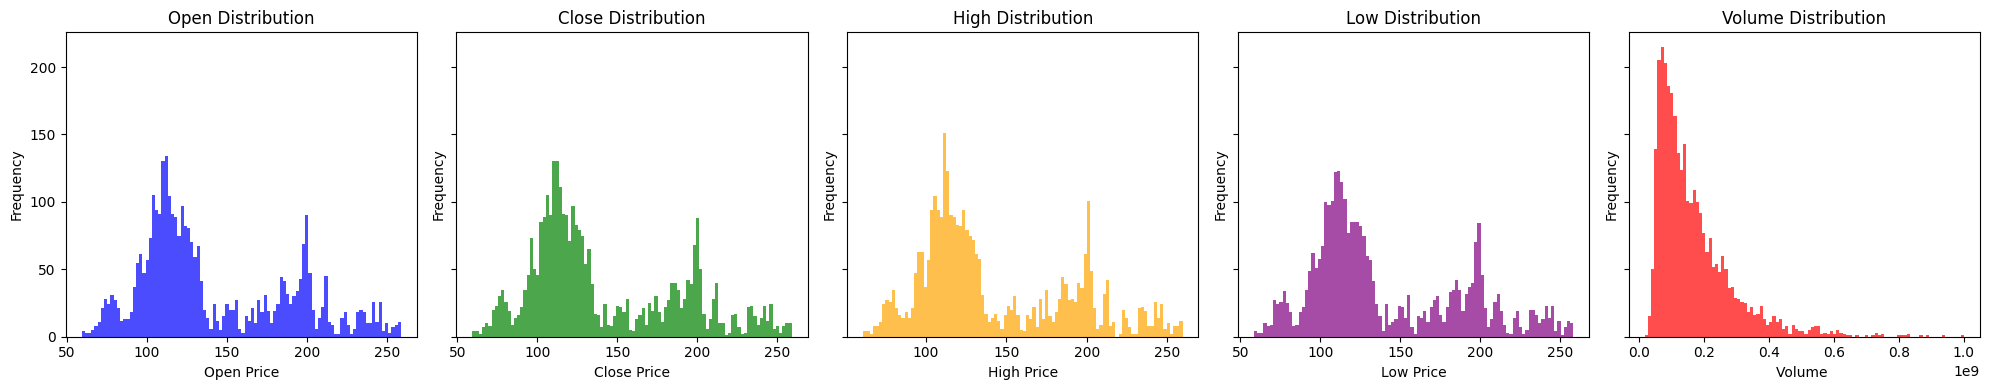

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Open', 'Close', 'High', 'Low', and 'Volume' columns

# Set up a figure with 1 row and 5 columns
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

# Define column names and colors for easy iteration
columns = ['Open', 'Close', 'High', 'Low', 'Volume']
colors = ['blue', 'green', 'orange', 'purple', 'red']

# Plot a histogram for each column
for i, column in enumerate(columns):
    axes[i].hist(df[column], bins=100, color=colors[i], alpha=0.7)
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_xlabel(f'{column} {"Price" if column != "Volume" else ""}')  # Set x-axis label
    axes[i].set_ylabel('Frequency')  # Set y-axis label for each plot

# Adjust layout to ensure readability
plt.tight_layout()
plt.show()


# Preprocessing

## Sliding window time series

In [20]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df is your DataFrame with 'Date', 'Open', 'High', 'Low', and 'Close' prices

# Create a column for anomaly detection
close_column = df['Close']
open_column = df['Open']
low_column = df['Low']
high_column = df['High']

# Parameters for the sliding window
window_percentage = 3  # Percentage for the window size
k_close = int(len(close_column) * (window_percentage / 2 / 100))
k_open = int(len(open_column) * (window_percentage / 2 / 100))
k_low = int(len(low_column) * (window_percentage / 2 / 100))
k_high = int(len(high_column) * (window_percentage / 2 / 100))

N = len(close_column)

# Function to get upper and lower bands
def get_bands(data, k):
    bands = []
    for i in range(N):
        if i < k or i + k >= N:
            bands.append((np.nan, np.nan))  # Avoiding edge effects
            continue
        window_data = data[i-k:i+k]
        bands.append((np.mean(window_data) + 3 * np.std(window_data),
                      np.mean(window_data) - 3 * np.std(window_data)))
    return zip(*bands)

# Calculate bands for each price type
upper_close, lower_close = get_bands(close_column, k_close)
upper_open, lower_open = get_bands(open_column, k_open)
upper_low, lower_low = get_bands(low_column, k_low)
upper_high, lower_high = get_bands(high_column, k_high)

# Identify anomalies for each price type
anomalies_close = (close_column > upper_close) | (close_column < lower_close)
anomalies_open = (open_column > upper_open) | (open_column < lower_open)
anomalies_low = (low_column > upper_low) | (low_column < lower_low)
anomalies_high = (high_column > upper_high) | (high_column < lower_high)

# Add anomaly information to the DataFrame
df['Anomalies_Close'] = anomalies_close
df['Anomalies_Open'] = anomalies_open
df['Anomalies_Low'] = anomalies_low
df['Anomalies_High'] = anomalies_high

# Create 2x2 subplots with tighter spacing and equal dimensions
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Closing Prices', 'Opening Prices', 'Low Prices', 'High Prices'),
    vertical_spacing=0.1,  # Adjust vertical spacing
    horizontal_spacing=0.1,  # Adjust horizontal spacing
    shared_xaxes=True,
    shared_yaxes=True,
)

# Add traces for Closing Prices
fig.add_trace(go.Scatter(x=df['Date'], y=close_column, mode='lines', name='Close', line=dict(color='blue')),
              row=1, col=1)
fig.add_trace(go.Scatter(x=df['Date'], y=upper_close, mode='lines', name='Upper Band', line=dict(color='red', dash='dash')),
              row=1, col=1)
fig.add_trace(go.Scatter(x=df['Date'], y=lower_close, mode='lines', name='Lower Band', line=dict(color='green', dash='dash')),
              row=1, col=1)
fig.add_trace(go.Scatter(x=df[df['Anomalies_Close']]['Date'], 
                         y=df[df['Anomalies_Close']]['Close'], 
                         mode='markers', name='Anomalies', marker=dict(color='orange', size=10)),
              row=1, col=1)

# Add traces for Opening Prices
fig.add_trace(go.Scatter(x=df['Date'], y=open_column, mode='lines', name='Open', line=dict(color='blue')),
              row=1, col=2)
fig.add_trace(go.Scatter(x=df['Date'], y=upper_open, mode='lines', name='Upper Band', line=dict(color='red', dash='dash')),
              row=1, col=2)
fig.add_trace(go.Scatter(x=df['Date'], y=lower_open, mode='lines', name='Lower Band', line=dict(color='green', dash='dash')),
              row=1, col=2)
fig.add_trace(go.Scatter(x=df[df['Anomalies_Open']]['Date'], 
                         y=df[df['Anomalies_Open']]['Open'], 
                         mode='markers', name='Anomalies', marker=dict(color='orange', size=10)),
              row=1, col=2)

# Add traces for Low Prices
fig.add_trace(go.Scatter(x=df['Date'], y=low_column, mode='lines', name='Low', line=dict(color='blue')),
              row=2, col=1)
fig.add_trace(go.Scatter(x=df['Date'], y=upper_low, mode='lines', name='Upper Band', line=dict(color='red', dash='dash')),
              row=2, col=1)
fig.add_trace(go.Scatter(x=df['Date'], y=lower_low, mode='lines', name='Lower Band', line=dict(color='green', dash='dash')),
              row=2, col=1)
fig.add_trace(go.Scatter(x=df[df['Anomalies_Low']]['Date'], 
                         y=df[df['Anomalies_Low']]['Low'], 
                         mode='markers', name='Anomalies', marker=dict(color='orange', size=10)),
              row=2, col=1)

# Add traces for High Prices
fig.add_trace(go.Scatter(x=df['Date'], y=high_column, mode='lines', name='High', line=dict(color='blue')),
              row=2, col=2)
fig.add_trace(go.Scatter(x=df['Date'], y=upper_high, mode='lines', name='Upper Band', line=dict(color='red', dash='dash')),
              row=2, col=2)
fig.add_trace(go.Scatter(x=df['Date'], y=lower_high, mode='lines', name='Lower Band', line=dict(color='green', dash='dash')),
              row=2, col=2)
fig.add_trace(go.Scatter(x=df[df['Anomalies_High']]['Date'], 
                         y=df[df['Anomalies_High']]['High'], 
                         mode='markers', name='Anomalies', marker=dict(color='orange', size=10)),
              row=2, col=2)

# Update layout settings and set margins to ensure equal dimensions for all subplots
fig.update_layout(title='Stock Prices with Outlier Detection',
                  height=800,
                  width=1200,
                  showlegend=False,
                  margin=dict(l=10, r=10, t=40, b=20),
                  xaxis_title="Date",
                  yaxis_title="Price")

# Show the plot
fig.show()


# Transformation

## Encoding categorical data

In [21]:
def encode_cyclical(a, max_value):
    x = (np.sin(2 * np.pi * a) + 1) / max_value
    y = (np.cos(2 * np.pi * a) + 1) / max_value
    return x, y

df['year'] = df['Date'].dt.year # This one is continious and numeric, must be scaled later
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.day_of_week
df['day_of_year'] = df['Date'].dt.day_of_year
df['is_month_end'] = df['Date'].dt.is_month_end
df['is_leap_year'] = df['Date'].dt.is_leap_year

# These are numerical, cyclic encoding for them
df['month_sin'], df['month_cos'] = encode_cyclical(df['month'], 12)
df['day_sin'], df['day_cos'] = encode_cyclical(df['day'], 31)
df['day_of_week_sin'], df['day_of_week_cos'] = encode_cyclical(df['day_of_week'], 7)
df['day_of_year_sin'], df['day_of_year_cos'] = encode_cyclical(df['day_of_year'], 366)

# These ones are categorical, one hot for them
df = pd.get_dummies(df, columns=['is_month_end', 'is_leap_year'])#.astype(int)

 # kan kanskje flytte denne over til den seksjonen hvor man fjerner features og sånn
df = df.drop(columns=['Date', 'month', 'day', 'day_of_week', 'day_of_year'])

## Log-transforming skewed volume data

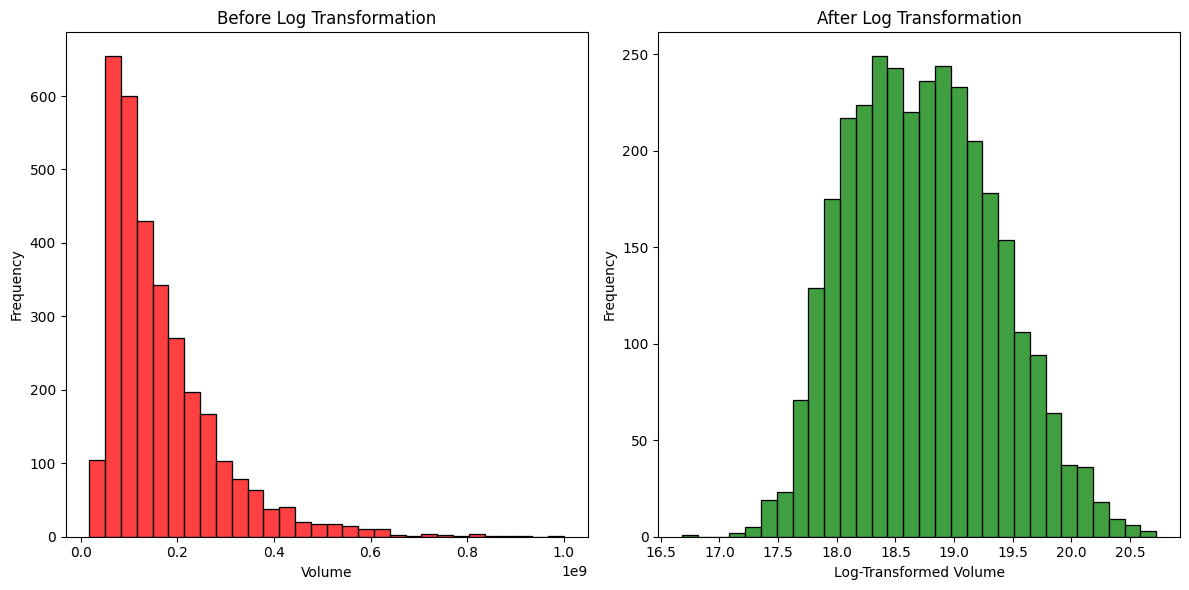

In [22]:
plt.figure(figsize=(12, 6))

# Plot before log transformation
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
sns.histplot(df['Volume'], bins=30, color='red')
plt.title('Before Log Transformation')
plt.xlabel('Volume')
plt.ylabel('Frequency')

# Apply log transformation
df['Volume'] = np.log1p(df['Volume'])  # log transformer den fordi den var skækk

# Plot after log transformation
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
sns.histplot(df['Volume'], bins=30, color='green')
plt.title('After Log Transformation')
plt.xlabel('Log-Transformed Volume')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Normalizing to scale numerical features

In [23]:
features_to_scale = ['Open', 'Close', 'High', 'Low', 'Volume', 'year']

scaler = MinMaxScaler() # Normalization fordi ikke normalfordeling

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

df.head()

,Open,High,Low,Close,Volume,OpenInt,Anomalies_Close,Anomalies_Open,Anomalies_Low,Anomalies_High,...,day_sin,day_cos,day_of_week_sin,day_of_week_cos,day_of_year_sin,day_of_year_cos,is_month_end_False,is_month_end_True,is_leap_year_False,is_leap_year_True
0,0.23,0.23,0.23,0.23,0.34,0,False,False,False,False,...,0.03,0.06,0.14,0.29,0.00,0.01,True,False,True,False
1,0.23,0.23,0.23,0.23,0.37,0,False,False,False,False,...,0.03,0.06,0.14,0.29,0.00,0.01,False,True,True,False
2,0.23,0.23,0.23,0.23,0.28,0,False,False,False,False,...,0.03,0.06,0.14,0.29,0.00,0.01,True,False,True,False
3,0.23,0.23,0.23,0.23,0.36,0,False,False,False,False,...,0.03,0.06,0.14,0.29,0.00,0.01,True,False,True,False
4,0.23,0.23,0.23,0.23,0.35,0,False,False,False,False,...,0.03,0.06,0.14,0.29,0.00,0.01,True,False,True,False


# Preprocess er ferdig